In [1]:
# Import necessary libraries
import pandas as pd

# Load dataset (replace with your dataset path)
# Simulated dataset of tweets with sentiment labels
data = pd.read_csv("https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv")

# Display dataset information
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None

First 5 rows:
   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [2]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Text cleaning function
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)    # Remove mentions
    text = re.sub(r"#\w+", "", text)    # Remove hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

# Apply text cleaning
data['cleaned_text'] = data['tweet'].apply(clean_text)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_text'])

# Define target variable (0: Negative, 1: Positive)
y = data['label']


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))

# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print("Bernoulli Naive Bayes Performance:")
print(classification_report(y_test, y_pred_bnb))

# Support Vector Machine
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Support Vector Machine Performance:")
print(classification_report(y_test, y_pred_svm))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5937
           1       0.88      0.20      0.33       456

    accuracy                           0.94      6393
   macro avg       0.91      0.60      0.65      6393
weighted avg       0.94      0.94      0.92      6393

Bernoulli Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5937
           1       0.46      0.47      0.46       456

    accuracy                           0.92      6393
   macro avg       0.71      0.71      0.71      6393
weighted avg       0.92      0.92      0.92      6393

Support Vector Machine Performance:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.84      0.29      0.43       456

    accuracy                           0.95      6393
   macro avg       0.89 

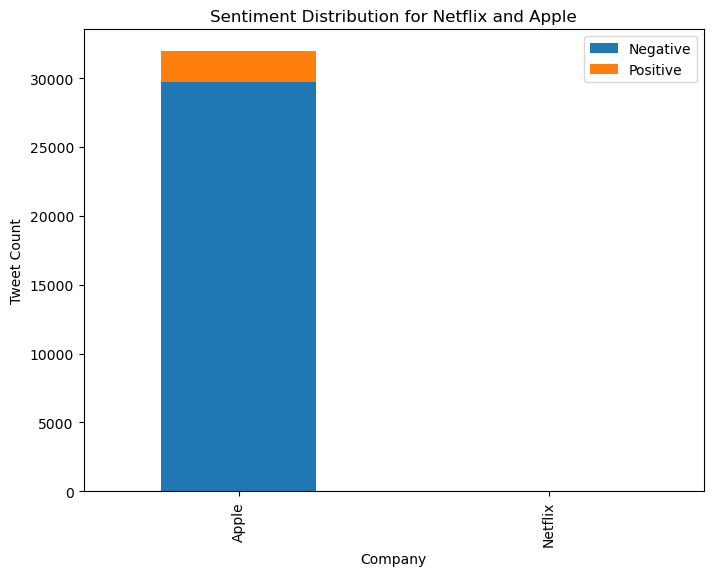

In [5]:
# Simulate sentiment for Netflix and Apple
import matplotlib.pyplot as plt
data['company'] = data['cleaned_text'].apply(lambda x: 'Netflix' if 'netflix' in x else 'Apple')
trend = data.groupby(['company', 'label']).size().unstack()
trend.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title("Sentiment Distribution for Netflix and Apple")
plt.xlabel("Company")
plt.ylabel("Tweet Count")
plt.legend(['Negative', 'Positive'])
plt.show()


In [6]:
import joblib

# Save the model
joblib.dump(lr, "logistic_regression_tweet_emotion.pkl")
print("Model saved as logistic_regression_tweet_emotion.pkl")


Model saved as logistic_regression_tweet_emotion.pkl


In [7]:
netflix_tweets = data[data['cleaned_text'].str.contains('netflix', case=False)]
print("Number of Netflix tweets:", len(netflix_tweets))


Number of Netflix tweets: 19


In [8]:
data['company'] = data['cleaned_text'].apply(
    lambda x: 'Netflix' if 'netflix' in x.lower() else 'Apple' if 'apple' in x.lower() else 'Other'
)


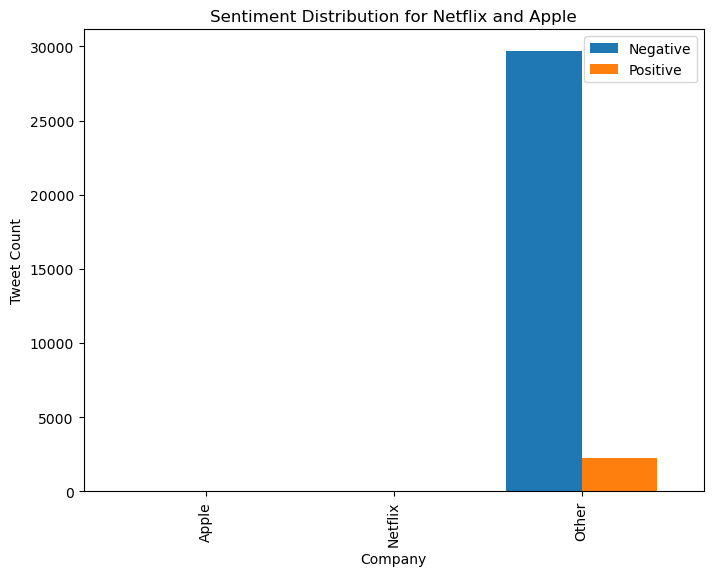

In [9]:
trend = data.groupby(['company', 'label']).size().unstack(fill_value=0)

trend.plot(kind='bar', figsize=(8, 6), width=0.8)
plt.title("Sentiment Distribution for Netflix and Apple")
plt.xlabel("Company")
plt.ylabel("Tweet Count")
plt.legend(['Negative', 'Positive'])
plt.show()


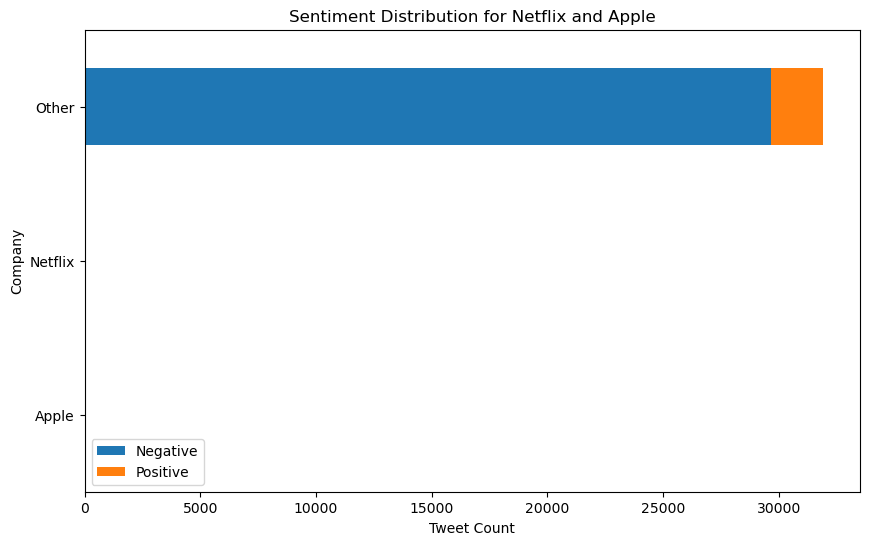

In [11]:
# Horizontal bar chart
trend = data.groupby(['company', 'label']).size().unstack(fill_value=0)
trend.plot(kind='barh', figsize=(10, 6), stacked=True)

plt.title("Sentiment Distribution for Netflix and Apple")
plt.xlabel("Tweet Count")
plt.ylabel("Company")
plt.legend(['Negative', 'Positive'])
plt.show()


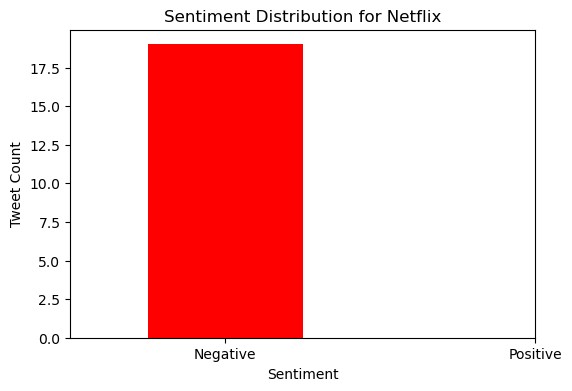

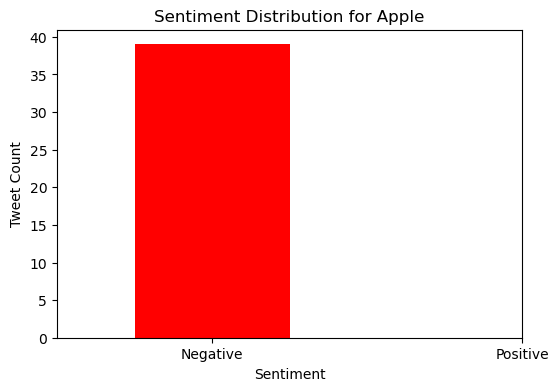

In [13]:
# Separate charts for each company
companies = ['Netflix', 'Apple']

for company in companies:
    subset = data[data['company'] == company].groupby('label').size()
    subset.plot(kind='bar', figsize=(6, 4), color=['red', 'green'])

    plt.title(f"Sentiment Distribution for {company}")
    plt.xlabel("Sentiment")
    plt.ylabel("Tweet Count")
    plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)
    plt.show()
